# Getting or Losing it: How Children Reason about Changes over Time
## Goals:
1. Children's understanding about the past, the present, and the future
   * Past events cause changes in the present state
   * Future events hold changes until a future time point
2. Flexibility in applying such understanding to reason about changes in gain scenarios vs. loss scenarios

## Design:

| Cond.\Scen.             | Gain Scenario   | Loss Scenario  |
|--------------|-----------------|----------------|
|   Test Condition  | 3 trials        | 3 trials       |
| Control Condition | 3 trials        | 3 trials       |

* Age groups: 3-year-olds, 4-year-olds, 5-year-olds

## Task:
* Test Condition: Temporal Reasoning Task

<img src="Temporal_Reasoning_Task.png">

* Condition Condition: Item Matching Task

<img src="Item_Matching_Task.png">

## Responses
* Correct(1) or Wrong(0) per trials
* Accuracy can be calculated based on conditions or scenarios(depending the research questions)

## R Set Up

In [18]:
library(lme4)
library(lmerTest)
library(ggplot2)
library(cowplot)
library(repr)

## Read and Visualize the Accuracy Data 

In [52]:
# Read accuracy data (accuracy is percentage correct, calculated across conditions and scenarios)
AccData = read.csv("AccData041318.csv")
AccData

ID,Age,AgeGroup,Accuracy,GainLoss,Condition
TCR3111,3.17,3,0.3333,Gain,Test
TCR3111,3.17,3,0.3333,Gain,Control
TCR3111,3.17,3,1.0000,Loss,Test
TCR3111,3.17,3,0.3333,Loss,Control
TCR3022,3.33,3,0.6667,Gain,Test
TCR3022,3.33,3,0.6667,Gain,Control
TCR3022,3.33,3,0.6667,Loss,Test
TCR3022,3.33,3,0.6667,Loss,Control
TCR3141,3.33,3,0.6667,Gain,Test
TCR3141,3.33,3,1.0000,Gain,Control


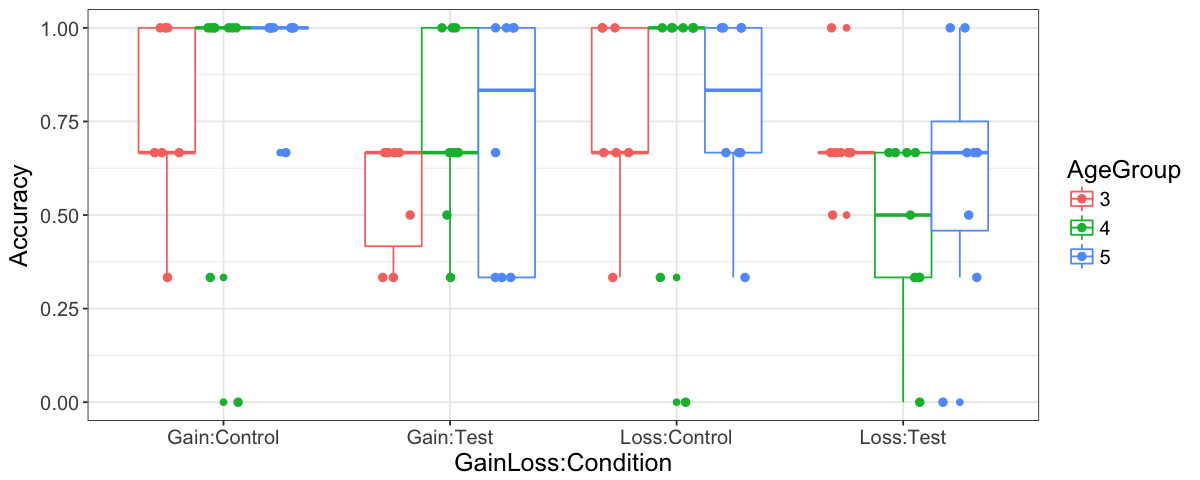

In [50]:
# Plot the scatter-boxplot for accuracy
ggplot(AccData, aes(x=GainLoss:Condition, y=Accuracy,tck=0.1, color=AgeGroup)) + 
        geom_boxplot(aes(color = factor(AgeGroup))) + 
        geom_point(aes(color = factor(AgeGroup)),size=2,position=position_jitterdodge()) +
        theme_bw() + theme(text = element_text(size = 15))
options(repr.plot.width=8, repr.plot.height=4)

## Planned Analysis on Accuracy When Data Collection is Completed

In [30]:
# Fit a linear model to Accuracy with Age Groups, Scenarios, and Conditions as predictors  
fit1 = lm(Accuracy~AgeGroup*GainLoss*Condition,data = AccData) 
summary(fit1)
anova(fit1)


Call:
lm(formula = Accuracy ~ AgeGroup * GainLoss * Condition, data = AccData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.84309 -0.12199  0.05757  0.19498  0.46053 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)
(Intercept)                          0.44569    0.28988   1.538    0.128
AgeGroup                             0.09935    0.07039   1.411    0.162
GainLossLoss                         0.28969    0.40995   0.707    0.482
ConditionTest                       -0.09421    0.40995  -0.230    0.819
AgeGroup:GainLossLoss               -0.08542    0.09955  -0.858    0.393
AgeGroup:ConditionTest              -0.02136    0.09955  -0.215    0.831
GainLossLoss:ConditionTest           0.09100    0.57976   0.157    0.876
AgeGroup:GainLossLoss:ConditionTest -0.03111    0.14078  -0.221    0.826

Residual standard error: 0.2722 on 88 degrees of freedom
Multiple R-squared:  0.1703,	Adjusted R-squared:  0.1043 
F-statistic:  2.58 on 7 and 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
AgeGroup,1,0.087219537,0.087219537,1.17674825,0.2809819236
GainLoss,1,0.127589584,0.127589584,1.72141270,0.1929235570
Condition,1,0.940064584,0.940064584,12.68316008,0.0005980298
AgeGroup:GainLoss,1,0.152508328,0.152508328,2.05761132,0.1549916263
AgeGroup:Condition,1,0.020384025,0.020384025,0.27501711,0.6013044505
GainLoss:Condition,1,0.007231482,0.007231482,0.09756568,0.7555096572
AgeGroup:GainLoss:Condition,1,0.003618194,0.003618194,0.04881593,0.8256484348
Residuals,88,6.522482001,0.074119114,NA,NA


In [29]:
# Fit a linear model to Accuracy with Age Groups, Scenarios, and Conditions as fixed effects, participants as a random effect  
fit2 = lmer(Accuracy~AgeGroup*GainLoss*Condition+(1|ID),data = AccData) 
summary(fit2)
anova(fit2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Accuracy ~ AgeGroup * GainLoss * Condition + (1 | ID)
   Data: AccData

REML criterion at convergence: 43.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0239 -0.4557  0.2126  0.6847  1.6861 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept) 0.004588 0.06773 
 Residual             0.069531 0.26369 
Number of obs: 96, groups:  ID, 24

Fixed effects:
                                    Estimate Std. Error       df t value
(Intercept)                          0.44569    0.28988 86.99998   1.538
AgeGroup                             0.09935    0.07039 86.99998   1.411
GainLossLoss                         0.28969    0.39706 66.00000   0.730
ConditionTest                       -0.09421    0.39706 66.00000  -0.237
AgeGroup:GainLossLoss               -0.08542    0.09642 66.00000  -0.886
AgeGroup:ConditionTest              -0.02136    0.09642 66.00000  -0.

,Sum Sq,Mean Sq,NumDF,DenDF,F value,Pr(>F)
AgeGroup,0.069006406,0.069006406,1,22,0.99245236,0.3299756
GainLoss,0.099099945,0.099099945,1,66,1.42525860,0.2368132
Condition,0.002093203,0.002093203,1,66,0.03010451,0.8627844
AgeGroup:GainLoss,0.152508328,0.152508328,1,66,2.19337968,0.1433634
AgeGroup:Condition,0.020384025,0.020384025,1,66,0.29316370,0.5900234
GainLoss:Condition,0.001826115,0.001826115,1,66,0.02626325,0.8717542
AgeGroup:GainLoss:Condition,0.003618194,0.003618194,1,66,0.05203698,0.8202612


## Read and Visualize the Trial Level Data 

In [32]:
# Read data from trial level (dataset is long form with single participant's performance on each condition and scenario stacked)
TrialData = read.csv("TrialData041318.csv")
TrialData

# Subset TrialData according scenarios 
TrialData_Gain = TrialData[which(TrialData$Condition=="GainControl"|TrialData$Condition=="GainTest"),]
TrialData_Loss = TrialData[which(TrialData$Condition=="LossControl"|TrialData$Condition=="LossTest"),]

ID,Age,Example,Condition,MemQs,TQ,PracMemQs,PracTQ
TCR4111,4,buy shoes,GainTest,2,1,2,NA
TCR4111,4,give gifts,LossControl,2,1,2,NA
TCR4111,4,bake desserts,GainControl,2,0,2,NA
TCR4111,4,get gifts,GainControl,2,0,2,NA
TCR4111,4,eat a cake,LossTest,2,0,2,NA
TCR4111,4,build a lego house,GainTest,2,1,2,1
TCR4111,4,empty the bucket,LossTest,2,1,2,1
TCR4111,4,give stickers,LossTest,0,1,2,1
TCR4111,4,draw a picture,GainTest,2,1,2,1
TCR4111,4,give away old stuff,LossControl,2,0,2,1


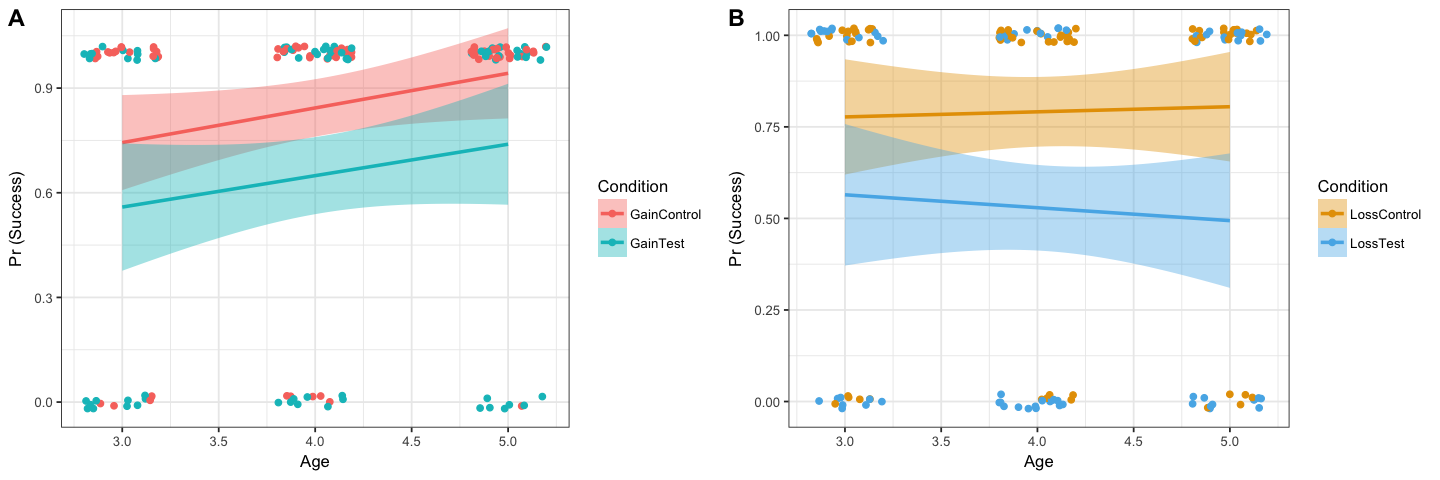

In [49]:
# Plot performances in relation to age for gain scenario (based on generalized linear model)
Trend_Gain = ggplot(TrialData_Gain, aes(Age, TQ, color=Condition),ylim=1.3,tck=0.2) + 
            stat_smooth(method="glm", formula=y~x, size=1, aes(fill=Condition)) +
            geom_point(position=position_jitter(height=0.02, width=0.2)) +
            xlab("Age") + ylab("Pr (Success)") + theme_bw() + theme(text = element_text(size = 10))

# Plot performance in relation to age for loss scenario (based on generalized linear model)
Trend_Loss = ggplot(TrialData_Loss, aes(Age, TQ, color=Condition),ylim=1.2,tck=0.2) + 
                stat_smooth(method="glm", formula=y~x, size=1, aes(fill=Condition)) +
                geom_point(position=position_jitter(height=0.02, width=0.2)) +
                xlab("Age") + ylab("Pr (Success)") + theme_bw() + scale_fill_manual(values=c("#E69F00", "#56B4E9")) + 
                scale_color_manual(values=c("#E69F00", "#56B4E9")) + theme(text = element_text(size = 10))

# Plot the relationships for the two scenarios together
plot_grid(Trend_Gain,Trend_Loss,labels="AUTO")
options(repr.plot.width=10, repr.plot.height=4)

## Planned Analysis on Trial-Level Performance When Data Collection is Completed

In [51]:
# Fit a generalize linear model using binomial family to trial level performance 
#  with Age Groups and Conditions as fixed effects  
fit3 = glm(TQ~Age*Condition,data = TrialData,family = binomial) 
summary(fit3)
anova(fit3)


Call:
glm(formula = TQ ~ Age * Condition, family = binomial, data = TrialData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3232  -1.2277   0.6589   0.7888   1.1878  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)  
(Intercept)               -1.4237     1.7154  -0.830   0.4066  
Age                        0.8105     0.4539   1.786   0.0742 .
ConditionGainTest          0.4468     2.1467   0.208   0.8351  
ConditionLossControl       2.4189     2.2802   1.061   0.2888  
ConditionLossTest          2.1085     2.1144   0.997   0.3187  
Age:ConditionGainTest     -0.4089     0.5549  -0.737   0.4612  
Age:ConditionLossControl  -0.7261     0.5840  -1.243   0.2137  
Age:ConditionLossTest     -0.9524     0.5440  -1.751   0.0800 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 349.45  on 287  degrees of freedom
Residual deviance: 322.43  on 280  

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,287,349.4529
Age,1,1.523610,286,347.9293
Condition,3,21.752759,283,326.1765
Age:Condition,3,3.749499,280,322.4270


In [38]:
# Fit a generalize linear model using binomial family to trial level performance 
#  with Age Groups and Conditions as fixed effects and memory performance as a covariate   
fit4 = glm(TQ~MemQs+Age*Condition,data = TrialData,family = binomial) 
summary(fit4)
anova(fit4)


Call:
glm(formula = TQ ~ MemQs + Age * Condition, family = binomial, 
    data = TrialData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3232  -1.0090   0.6589   0.7888   1.8009  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)   
(Intercept)               -3.1098     1.8101  -1.718  0.08580 . 
MemQs                      0.8431     0.2890   2.917  0.00353 **
Age                        0.8105     0.4539   1.786  0.07417 . 
ConditionGainTest          0.9265     2.1881   0.423  0.67197   
ConditionLossControl       2.4189     2.2802   1.061  0.28876   
ConditionLossTest          2.6313     2.1429   1.228  0.21948   
Age:ConditionGainTest     -0.4559     0.5633  -0.809  0.41836   
Age:ConditionLossControl  -0.7261     0.5840  -1.243  0.21374   
Age:ConditionLossTest     -1.0413     0.5492  -1.896  0.05797 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

  

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,287,349.4529
MemQs,1,16.0093183,286,333.4436
Age,1,0.8731266,285,332.5705
Condition,3,15.5355721,282,317.0349
Age:Condition,3,4.2137889,279,312.8211
